/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


Episode 100: Total Reward: 40.0
Episode 200: Total Reward: 50.0
Episode 300: Total Reward: 33.0
Episode 400: Total Reward: 61.0
Episode 500: Total Reward: 83.0
Episode 600: Total Reward: 48.0
Episode 700: Total Reward: 87.0
Episode 800: Total Reward: 61.0
Episode 900: Total Reward: 82.0
Episode 1000: Total Reward: 61.0
Episode 1100: Total Reward: 63.0
Episode 1200: Total Reward: 67.0
Episode 1300: Total Reward: 62.0
Episode 1400: Total Reward: 73.0
Episode 1500: Total Reward: 78.0
Episode 1600: Total Reward: 77.0
Episode 1700: Total Reward: 71.0
Episode 1800: Total Reward: 88.0
Episode 1900: Total Reward: 71.0
Episode 2000: Total Reward: 61.0
Training finished.



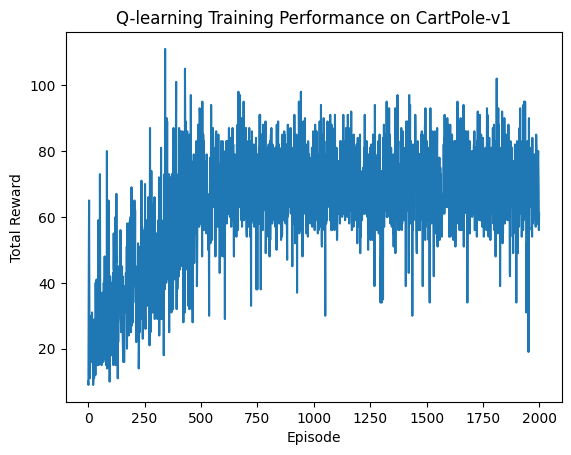

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create the CartPole-v1 environment
env = gym.make('CartPole-v1')

# Set the seed for reproducibility
env.seed(42)
np.random.seed(42)
random.seed(42)

class QLearningAgent:
    def __init__(self, state_bins, action_size):
        self.state_bins = state_bins
        self.action_size = action_size
        self.q_table = np.zeros(tuple(len(bins) + 1 for bins in state_bins) + (action_size,))
        self.learning_rate = 0.1
        self.discount_factor = 0.99
        self.exploration_rate = 1.0
        self.exploration_decay = 0.995
        self.exploration_min = 0.01

    def get_discrete_state(self, state):
        discrete_state = []
        for i in range(len(state)):
            discrete_state.append(np.digitize(state[i], self.state_bins[i]) - 1)
        return tuple(discrete_state)

    def choose_action(self, state):
        if np.random.rand() <= self.exploration_rate:
            return random.choice(range(self.action_size))
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action] * (not done)
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error
        if done:
            self.exploration_rate = max(self.exploration_min, self.exploration_rate * self.exploration_decay)

state_bins = [
    np.linspace(-2.4, 2.4, 10),  # Cart position
    np.linspace(-3.0, 3.0, 10),  # Cart velocity
    np.linspace(-0.5, 0.5, 10),  # Pole angle
    np.linspace(-2.0, 2.0, 10)   # Pole velocity at tip
]

# Initialize the Q-learning agent
agent = QLearningAgent(state_bins=state_bins, action_size=env.action_space.n)

# Training parameters
num_episodes = 2000
max_steps = 400
rewards = []

for episode in range(num_episodes):
    state = env.reset()
    state = agent.get_discrete_state(state)
    total_reward = 0

    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        next_state = agent.get_discrete_state(next_state)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break

    rewards.append(total_reward)
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Total Reward: {total_reward}")

print("Training finished.\n")

# Plot the results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-learning Training Performance on CartPole-v1')
plt.show()
